# Quitar Overfit a Decision Tree

La implementación por defecto de DecisionTreeClassifier de Scikit-learn hace overfit, pues no pone ningún límite al crecimiento del árbol. Pero no está claro hasta qué punto tenemos que dejarlo crecer, y hay muchos hiper-parámetros para modificar esto. En este notebook voy a trastear con los parámetros para ver como se comportan

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from time import time
import math

# Import datasets, classifiers and performance metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

## min_impurity_decrease

In [2]:
digits = datasets.load_digits()

data = digits.data
target = digits.target
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

data = digits.data

# Algunas columnas tienen todo 0. Estas features no aportan ninguna información,
# y además me impiden estandarizar, pues la std es 0
# La vamos a quitar. Este array es de booleanos
valid_cols = np.apply_along_axis(lambda a: np.count_nonzero(a) > 0, axis = 0, arr = data)

data.shape

data = data[:, valid_cols]

data.shape

mean = data.mean(axis = 0)
std = data.std(axis = 0)

data = (data - mean)/std

data_train = data[:N_train]
data_test = data[N_train:]

target_train = target[:N_train]
target_test = target[N_train:]

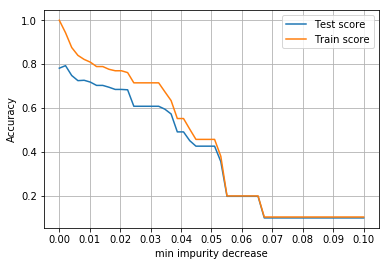

In [47]:
#decreases = np.arange(0,100)
#decreases = np.arange(0,0.1, 0.01)
decreases = np.linspace(0,0.1)

test_scores = []
train_scores = []

clf = DecisionTreeClassifier()

for dec in decreases:
    clf.set_params(min_impurity_decrease = dec)
    clf.fit(data_train, target_train)
    test_score = clf.score(data_test, target_test)
    train_score = clf.score(data_train, target_train)
    
    test_scores.append(test_score)
    train_scores.append(train_score)

accuracy = plt.subplot(111)
accuracy.plot(decreases, test_scores, label = "Test score")
accuracy.plot(decreases, train_scores, label = "Train score")
#accuracy.xaxis.set_ticks(np.arange(0,100, 10))
accuracy.locator_params(nbins = 15, axis = "x")
accuracy.grid(True)
plt.xlabel("min impurity decrease")
plt.ylabel("Accuracy")

accuracy.legend(loc='best')

min_impurity_decrease

A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

The weighted impurity decrease equation is the following:

```
N_t / N * (impurity - N_t_R / N_t * right_impurity
                    - N_t_L / N_t * left_impurity)
```


## max_depth

In [23]:
digits = datasets.load_digits()

data = digits.data
target = digits.target
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

data = digits.data

# Algunas columnas tienen todo 0. Estas features no aportan ninguna información,
# y además me impiden estandarizar, pues la std es 0
# La vamos a quitar. Este array es de booleanos
valid_cols = np.apply_along_axis(lambda a: np.count_nonzero(a) > 0, axis = 0, arr = data)

data.shape

data = data[:, valid_cols]

data.shape

mean = data.mean(axis = 0)
std = data.std(axis = 0)

data = (data - mean)/std

data_train = data[:N_train]
data_test = data[N_train:]

target_train = target[:N_train]
target_test = target[N_train:]

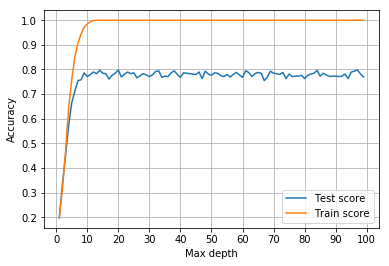

In [33]:
depth = np.arange(1,100)
test_scores = []
train_scores = []

clf = DecisionTreeClassifier()

for dep in depth:
    clf.set_params(max_depth = dep)
    clf.fit(data_train, target_train)
    test_score = clf.score(data_test, target_test)
    train_score = clf.score(data_train, target_train)
    
    test_scores.append(test_score)
    train_scores.append(train_score)

accuracy = plt.subplot(111)
accuracy.plot(depth, test_scores, label = "Test score")
accuracy.plot(depth, train_scores, label = "Train score")
#accuracy.xaxis.set_ticks(np.arange(0,depth[-1], depth[-1] / 10))
accuracy.locator_params(nbins = 15, axis = "x")
accuracy.grid(True)
plt.xlabel("Max depth")
plt.ylabel("Accuracy")

accuracy.legend(loc='best')

max_depth

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

## min_samples_split

In [6]:
digits = datasets.load_digits()

In [7]:
data = digits.data
target = digits.target
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

In [8]:
data = digits.data

In [9]:
# Algunas columnas tienen todo 0. Estas features no aportan ninguna información,
# y además me impiden estandarizar, pues la std es 0
# La vamos a quitar. Este array es de booleanos
valid_cols = np.apply_along_axis(lambda a: np.count_nonzero(a) > 0, axis = 0, arr = data)

In [10]:
data.shape

(1797, 64)

In [11]:
data = data[:, valid_cols]

In [12]:
data.shape

(1797, 61)

In [13]:
mean = data.mean(axis = 0)
std = data.std(axis = 0)

data = (data - mean)/std

In [14]:
data_train = data[:N_train]
data_test = data[N_train:]

target_train = target[:N_train]
target_test = target[N_train:]

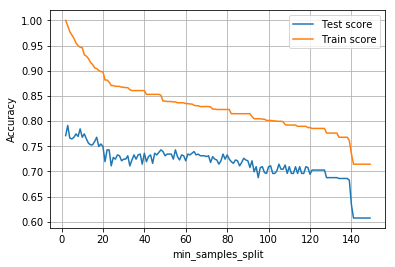

In [39]:
sample_sizes = np.arange(2,150)
test_scores = []
train_scores = []

clf = DecisionTreeClassifier()

for dep in sample_sizes:
    clf.set_params(min_samples_split = dep)
    clf.fit(data_train, target_train)
    
    test_score = clf.score(data_test, target_test)
    train_score = clf.score(data_train, target_train)
    
    test_scores.append(test_score)
    train_scores.append(train_score)

accuracy = plt.subplot(111)
accuracy.plot(sample_sizes, test_scores, label = "Test score")
accuracy.plot(sample_sizes, train_scores, label = "Train score")
#accuracy.xaxis.set_ticks(np.arange(0,depth[-1], depth[-1] / 10))
accuracy.locator_params(nbins = 15, axis = "x")
accuracy.grid(True)
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")

accuracy.legend(loc='best')

min_samples_split

The minimum number of samples required to split an internal node

## min_samples_leaf

In [18]:
digits = datasets.load_digits()

data = digits.data
target = digits.target
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

data = digits.data

# Algunas columnas tienen todo 0. Estas features no aportan ninguna información,
# y además me impiden estandarizar, pues la std es 0
# La vamos a quitar. Este array es de booleanos
valid_cols = np.apply_along_axis(lambda a: np.count_nonzero(a) > 0, axis = 0, arr = data)

data.shape

data = data[:, valid_cols]

data.shape

mean = data.mean(axis = 0)
std = data.std(axis = 0)

data = (data - mean)/std

data_train = data[:N_train]
data_test = data[N_train:]

target_train = target[:N_train]
target_test = target[N_train:]

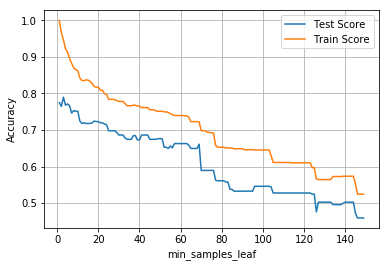

In [19]:
sample_sizes = np.arange(1,150)
test_scores = []
train_scores = []

clf = DecisionTreeClassifier()

for dep in sample_sizes:
    clf.set_params(min_samples_leaf = dep)
    clf.fit(data_train, target_train)
    test_score = clf.score(data_test, target_test)
    train_score = clf.score(data_train, target_train)
    
    test_scores.append(test_score)
    train_scores.append(train_score)

accuracy = plt.subplot(111)
accuracy.plot(sample_sizes, test_scores, label = "Test Score")
accuracy.plot(sample_sizes, train_scores, label = "Train Score")
#accuracy.xaxis.set_ticks(np.arange(0,depth[-1], depth[-1] / 10))
accuracy.locator_params(nbins = 15, axis = "x")
accuracy.grid(True)
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")

accuracy.legend(loc='best')

min_samples_leaf

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

## min_weight_fraction_leaf

In [41]:
digits = datasets.load_digits()

data = digits.data
target = digits.target
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

data = digits.data

# Algunas columnas tienen todo 0. Estas features no aportan ninguna información,
# y además me impiden estandarizar, pues la std es 0
# La vamos a quitar. Este array es de booleanos
valid_cols = np.apply_along_axis(lambda a: np.count_nonzero(a) > 0, axis = 0, arr = data)

data.shape

data = data[:, valid_cols]

data.shape

mean = data.mean(axis = 0)
std = data.std(axis = 0)

data = (data - mean)/std

data_train = data[:N_train]
data_test = data[N_train:]

target_train = target[:N_train]
target_test = target[N_train:]

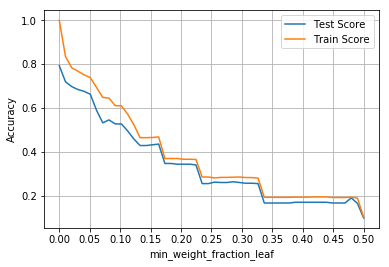

In [48]:
#sample_sizes = np.arange(0.0,0.5, 0.02)
sample_sizes = np.linspace(0,0.5)
test_scores = []
train_scores = []

clf = DecisionTreeClassifier()

for dep in sample_sizes:
    clf.set_params(min_weight_fraction_leaf = dep)
    clf.fit(data_train, target_train)
    test_score = clf.score(data_test, target_test)
    train_score = clf.score(data_train, target_train)
    
    test_scores.append(test_score)
    train_scores.append(train_score)

accuracy = plt.subplot(111)
accuracy.plot(sample_sizes, test_scores, label = "Test Score")
accuracy.plot(sample_sizes, train_scores, label = "Train Score")
#accuracy.xaxis.set_ticks(np.arange(0,depth[-1], depth[-1] / 10))
accuracy.locator_params(nbins = 15, axis = "x")
accuracy.grid(True)
plt.xlabel("min_weight_fraction_leaf")
plt.ylabel("Accuracy")

accuracy.legend(loc='best')

min_weight_fraction_leaf

The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

## max_leaf_nodes

In [51]:
digits = datasets.load_digits()

data = digits.data
target = digits.target
N = data.shape[0]
prop_train = 2 / 3
N_train = math.ceil(N * prop_train)
N_test = N - N_train

data = digits.data

# Algunas columnas tienen todo 0. Estas features no aportan ninguna información,
# y además me impiden estandarizar, pues la std es 0
# La vamos a quitar. Este array es de booleanos
valid_cols = np.apply_along_axis(lambda a: np.count_nonzero(a) > 0, axis = 0, arr = data)

data.shape

data = data[:, valid_cols]

data.shape

mean = data.mean(axis = 0)
std = data.std(axis = 0)

data = (data - mean)/std

data_train = data[:N_train]
data_test = data[N_train:]

target_train = target[:N_train]
target_test = target[N_train:]

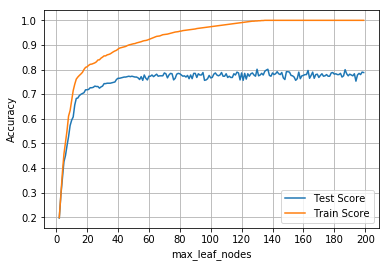

In [55]:
sample_sizes = np.arange(2, 200)
#sample_sizes = np.linspace(0,0.5)
test_scores = []
train_scores = []

clf = DecisionTreeClassifier()

for dep in sample_sizes:
    clf.set_params(max_leaf_nodes = dep)
    clf.fit(data_train, target_train)
    test_score = clf.score(data_test, target_test)
    train_score = clf.score(data_train, target_train)
    
    test_scores.append(test_score)
    train_scores.append(train_score)

accuracy = plt.subplot(111)
accuracy.plot(sample_sizes, test_scores, label = "Test Score")
accuracy.plot(sample_sizes, train_scores, label = "Train Score")
#accuracy.xaxis.set_ticks(np.arange(0,depth[-1], depth[-1] / 10))
accuracy.locator_params(nbins = 15, axis = "x")
accuracy.grid(True)
plt.xlabel("max_leaf_nodes")
plt.ylabel("Accuracy")

accuracy.legend(loc='best')

max_leaf_nodes

Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.